In [1]:
from BuildGraph import L2_distance, get_distance_mu_std_var, get_weight_adj

# Generate W

(6472, 2048)
6472


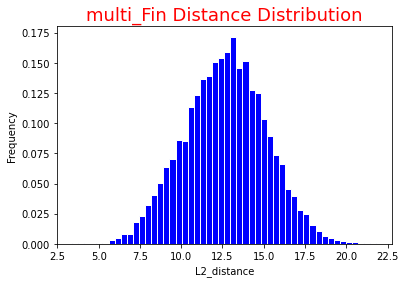

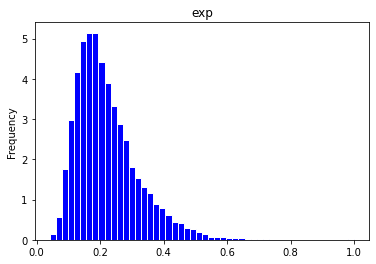

In [89]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

name = 'humanskin/x3'
filter_file = f'data/{name}/position_enhance_with_center.csv'
nn = 4
feature_file = f'data/{name}/support_feature.npy'
source = 'image'
dim = 2048
modes = ['exp']

min_, median_ = get_distance_mu_std_var(name, filter_file, feature_file, nn, dim, L2_distance)
n_index_dict = {}
for mode in modes:
    index = get_weight_adj(filter_file, feature_file, nn, dim, min_, median_, mode, L2_distance, 1/(0.2))
    n_index_dict[mode] = index

for mode in modes:
    plt.hist(n_index_dict[mode][:, 2], bins=50, color="blue", density=True, histtype="bar", edgecolor='white')
    plt.ylabel("Frequency")  # 显示图例plt.legend(loc = 'best')
    plt.title(mode)
    # 显示图形
    plt.show()
mode = modes[0]
adj_name = f'FinalData/{name}/sub_adj.npy'
np.save(adj_name, n_index_dict[mode])

(6472, 2048)


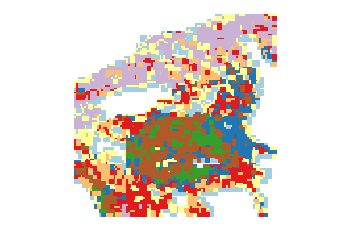

In [90]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, random_state=0, n_init=10)
feature = np.load(feature_file)
print(feature.shape)
ax = fig.add_subplot(1, 1, 1)
plt.axis("equal")
plt.axis('off')

filtered_position_df = pd.read_csv(filter_file)
row_s = filtered_position_df['imagerow']
col_s = -filtered_position_df['imagecol']

faeture_label = kmeans.fit(feature.reshape(-1, 2048)).labels_
plt.scatter(row_s, col_s, s=15,
            marker = 's',
            c=faeture_label,
            cmap='Paired',
            )
plt.show()

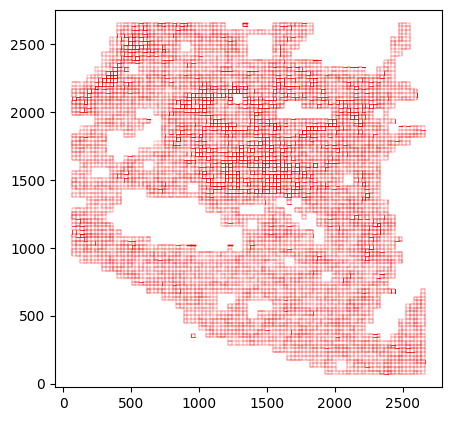

In [91]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

filtered_position_df = pd.read_csv(filter_file)
row_s = filtered_position_df['imagerow'].tolist()
col_s = filtered_position_df['imagecol'].tolist()

fig = plt.figure(figsize=(5, 5), dpi=100)
plt.axis("equal")
adj = np.load(f'FinalData/{name}/sub_adj.npy')
lines_num = adj.shape[0]
for e in range(lines_num):
    plt.plot([row_s[int(adj[e,0])], row_s[int(adj[e,1])]], [col_s[int(adj[e,0])], col_s[int(adj[e,1])]], color='r', linewidth=adj[e,2])

plt.show()

# Generate A for protein

In [93]:
count_df = pd.read_csv(f'data/{name}/reordered_filtered_protein.csv', index_col=0)
count_df

,HLA.DR..DP..DQ.AGCTACGAGCAGTAG,CD71.CCGTGTTCCTCATTA,CD235ab.GCTCCTTTACACGTA,CD146.CCTTGGATAACATCA,Podoplanin.GGTTACTCGTTGTGT,CD49b.GCTTTCTTCAGTATG,CD340..erbB2.HER.2..CTGTAGCCGCCTATT,CD55.GCTCATTACCCATTA,CD169..Sialoadhesin.Siglec.1..TACTCAGCGTGTTTG,IgM.TAGCGAGCCCGTATA,TMEM132D,CPNE5,RNA18S5,NMNAT1,RNA28S5
45x44,0,0,2,0,1,0,1,4,1,2,0,0,0,0,0
20x14,2,0,2,1,3,2,9,94,2,1,0,0,2,0,0
44x42,3,0,0,0,1,1,2,41,7,1,0,0,1,0,0
42x3,14,4,41,1,4,3,20,22,13,83,2,1,14,1,1
11x40,7,0,0,1,1,1,6,8,4,4,0,0,17,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24x10,3,1,1,0,1,1,8,66,8,14,3,0,11,0,1
15x29,3,3,0,1,4,1,3,19,0,2,0,0,9,1,3
13x33,6,0,0,0,0,0,4,27,10,1,0,0,12,0,5
32x48,8,0,0,0,3,0,1,9,0,0,0,0,2,0,0


In [94]:
roi_protien = pd.read_csv(f'data/{name}/HVP_top10.csv', index_col=0).keys().tolist()[1:5]
roi_gene = pd.read_csv(f'data/{name}/HVG_top10.csv', index_col=0).keys().tolist()[:4]
count_roi_df = count_df[roi_protien + roi_gene]
count_roi_df

,CD71.CCGTGTTCCTCATTA,CD235ab.GCTCCTTTACACGTA,CD146.CCTTGGATAACATCA,CD49b.GCTTTCTTCAGTATG,TMEM132D,CPNE5,RNA18S5,NMNAT1
45x44,0,2,0,0,0,0,0,0
20x14,0,2,1,2,0,0,2,0
44x42,0,0,0,1,0,0,1,0
42x3,4,41,1,3,2,1,14,1
11x40,0,0,1,1,0,0,17,1
...,...,...,...,...,...,...,...,...
24x10,1,1,0,1,3,0,11,0
15x29,3,0,1,1,0,0,9,1
13x33,0,0,0,0,0,0,12,0
32x48,0,0,0,0,0,0,2,0


In [95]:
np.save(f'FinalData/{name}/label.npy', count_roi_df.values)

In [106]:
count_roi_df.to_csv(f'FinalData/{name}/original_roi_count.csv')

(1618, 4)
1618


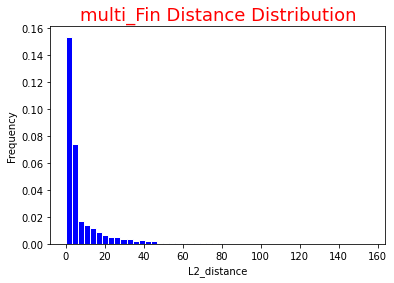

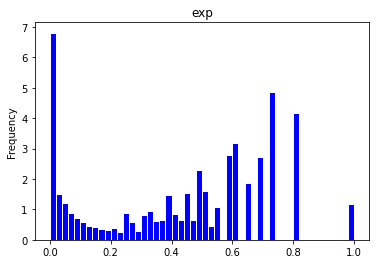

In [99]:
# filter_file = f'FinalData/{name}/colData_merge.csv'
filter_file = f'FinalData/{name}/position_with_center.csv'
nn = 4
feature_file = f'FinalData/{name}/label.npy'
source = 'protein'
dim = 4
modes = ['exp']

min_, median_ = get_distance_mu_std_var(name, filter_file, feature_file, nn, dim, L2_distance)
n_index_dict = {}
for mode in modes:
    index = get_weight_adj(filter_file, feature_file, nn, dim, min_, median_, mode, L2_distance)
    n_index_dict[mode] = index
# np.save(adj_name, n_index)

for mode in modes:
    plt.hist(n_index_dict[mode][:, 2], bins=50, color="blue", density=True, histtype="bar", edgecolor='white')
    plt.ylabel("Frequency")  # 显示图例plt.legend(loc = 'best')
    plt.title(mode)
    # 显示图形
    plt.show()
mode = modes[0]
adj_name = f'FinalData/{name}/adj_{source}.npy'
np.save(adj_name, n_index_dict[mode])

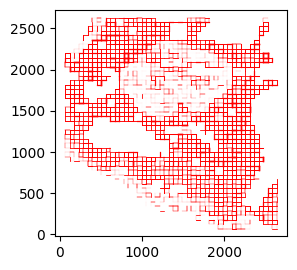

In [100]:
filtered_position_df = pd.read_csv(filter_file)
row_s = filtered_position_df['imagerow'].tolist()
col_s = filtered_position_df['imagecol'].tolist()

fig = plt.figure(figsize=(3, 3), dpi=100)
plt.axis("equal")
adj = np.load(adj_name)
lines_num = adj.shape[0]
for e in range(lines_num):
    plt.plot([row_s[int(adj[e,0])], row_s[int(adj[e,1])]], [col_s[int(adj[e,0])], col_s[int(adj[e,1])]], color='r', linewidth=adj[e,2])

plt.show()